In [2]:
DEBUG=False

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from nn_wrapper import NeuralNetworkWrapper
import numpy as np
from sklearn.metrics import accuracy_score

# Importing and cleaning MNIST dataset

In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Training neural network

Loss after 1 epochs: 1.656
Loss after 2 epochs: 1.257
Loss after 3 epochs: 0.996
Loss after 4 epochs: 0.817
Loss after 5 epochs: 0.697
Loss after 6 epochs: 0.614
Loss after 7 epochs: 0.554
Loss after 8 epochs: 0.509
Loss after 9 epochs: 0.474
Loss after 10 epochs: 0.445
Loss after 11 epochs: 0.422
Loss after 12 epochs: 0.402
Loss after 13 epochs: 0.385
Loss after 14 epochs: 0.371
Loss after 15 epochs: 0.358
Loss after 16 epochs: 0.346
Loss after 17 epochs: 0.336
Loss after 18 epochs: 0.326
Loss after 19 epochs: 0.317
Loss after 20 epochs: 0.309
Loss after 21 epochs: 0.301
Loss after 22 epochs: 0.294
Loss after 23 epochs: 0.288
Loss after 24 epochs: 0.282
Loss after 25 epochs: 0.276
Final loss: 0.276


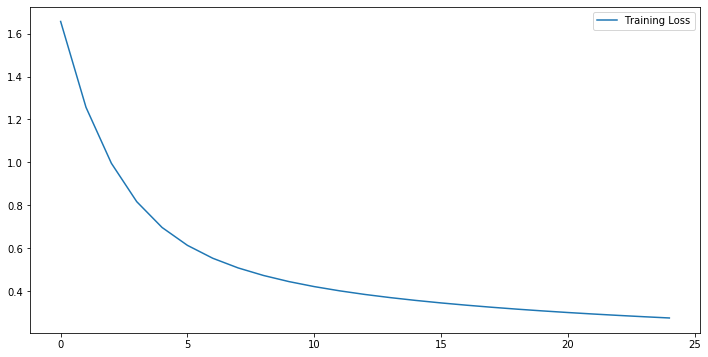

Accuracy on test set: 0.9118571428571428


In [8]:
NN = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500)

NN.train(X_train, y_train, 25, 0)
NN.plot_loss()

y_hat = NN.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit with validation split

Loss after 1 epochs: 1.925
Loss after 2 epochs: 1.407
Loss after 3 epochs: 1.147
Loss after 4 epochs: 0.988
Loss after 5 epochs: 0.874
Loss after 6 epochs: 0.784
Loss after 7 epochs: 0.711
Loss after 8 epochs: 0.652
Loss after 9 epochs: 0.603
Loss after 10 epochs: 0.563
Loss after 11 epochs: 0.530
Loss after 12 epochs: 0.501
Loss after 13 epochs: 0.477
Loss after 14 epochs: 0.456
Loss after 15 epochs: 0.437
Loss after 16 epochs: 0.421
Loss after 17 epochs: 0.406
Loss after 18 epochs: 0.392
Loss after 19 epochs: 0.380
Loss after 20 epochs: 0.369
Loss after 21 epochs: 0.358
Loss after 22 epochs: 0.348
Loss after 23 epochs: 0.339
Loss after 24 epochs: 0.331
Loss after 25 epochs: 0.323
Loss after 26 epochs: 0.316
Loss after 27 epochs: 0.309
Loss after 28 epochs: 0.302
Loss after 29 epochs: 0.295
Loss after 30 epochs: 0.289
Loss after 31 epochs: 0.284
Loss after 32 epochs: 0.278
Loss after 33 epochs: 0.273
Loss after 34 epochs: 0.268
Loss after 35 epochs: 0.263
Loss after 36 epochs: 0.259
L

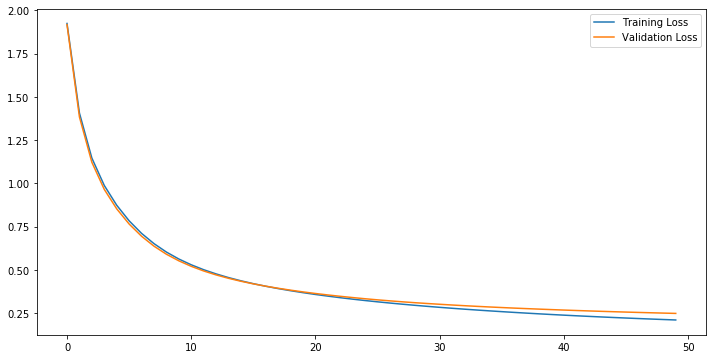

Accuracy on test set: 0.9251428571428572


In [9]:
NN2 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500)
NN2.train(X_train,
          y_train,
          50,
          0.1)
NN2.plot_loss()

y_hat = NN2.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit without bias

In [ ]:
NN3 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500,
                          bias=False)
NN3.train(X_train,
          y_train,
          50,
          0.1)
NN3.plot_loss()

y_hat = NN3.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')